In [1]:
#  Load results
import os
import pandas as pd

results_list = []
for idx in range(1, 11):
    results = pd.read_csv("./results/survey2/result" + str(idx).zfill(3) + ".csv")
    results_list.append(results)
    print(results_list)
# results = pd.read_csv("./results/survey/result" + str(1).zfill(3) + ".csv")
# results_list.append(results)
# print(results_list)

[                     Timestamp  \
0  2024/01/06 2:45:20 PM GMT+9   
1  2024/01/06 4:11:25 PM GMT+9   
2  2024/01/06 5:08:33 PM GMT+9   

  クラウドワークスのユーザー名を入力してください\n承認作業に必要となります。ユーザー名が未入力もしくはクラウドワークス側での作業者情報と一致しない場合、恐れ入りますが報酬をお支払いできませんのでご注意ください。また、ユーザー名はヘッダーメニュー、またはプロフィールページからご確認いただけます。表示名とは異なりますのでご注意ください。  \
0                                            3551128                                                                                                                        
1                                        K.Tominaga1                                                                                                                        
2                                               fqk1                                                                                                                        

   年齢(半角英数字) 性別  \
0         55  女   
1         55  男   
2         30  女   

  会話文1における「ええ、そうですね。ゴルフなんてちょっと憧れてしまうけど、どうです？やっぱり難しいですか？」とはどういうことかを2文程度で説明してください．  \
0       

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 117-118: invalid continuation byte

In [4]:
# Load form information
forms = []
for idx in range(1, 11):
    form = pd.read_csv("./new/sample/sample" + str(idx).zfill(3) + ".csv", encoding="shift-jis")
    forms.append(form)
# form = pd.read_csv("./form/sample" + str(1).zfill(3) + ".csv", encoding="shift-jis")
# forms.append(form)
print(forms)

[   Unnamed: 0                                      full_dialogue  \
0           0  A: こんにちは！わたしは今趣味のDIYにハマっているのだけど、あなたもなにかハマっているこ...   
1           0  A: こんばんは、調子はいかがですか？\n\nB: こんばんは。調子はまぁまぁかな？70年代...   
2           0  A: こんにちは。お話して大丈夫ですか？\n\nB: はい、大丈夫です。今、飼っている熱帯魚...   
3           0  A: あなたって高校のとき何か部に所属してた？\n\nB: ううん。帰宅部だったよ。あなたは...   
4           0  A: ああ、もう！ダンスの練習に行ったら、友達がみんな遅刻してきたの！参っちゃう！\n\nB...   
5           0  A: こんにちは。私は、看護師を目指して学校に通っています。あなたは何のお仕事をされています...   
6           0  A: ねえねえ！最近さー、また一段と体重が増えちゃったんだよね。\n\nB: そうなんだ？わ...   
7           0  A: こんばんは、寒くなってきましたが、石川県に転勤してきて、ますます寒さが身に染みています...   

                                    omitted_dialogue  \
0  A: こんにちは！わたしは今趣味のDIYにハマっているのだけど、あなたもなにかハマっているこ...   
1  A: こんばんは、調子はいかがですか？\n\nB: こんばんは。調子はまぁまぁかな？70年代...   
2  A: こんにちは。お話して大丈夫ですか？\n\nB: はい、大丈夫です。今、飼っている熱帯魚...   
3  A: あなたって高校のとき何か部に所属してた？\n\nB: ううん。帰宅部だったよ。あなたは...   
4  A: ああ、もう！ダンスの練習に行ったら、友達がみんな遅刻してきたの！参っちゃう！\n\nB...   
5  A: こんにちは。私は、看護師を目指して学校に通っています。あなたは何のお仕事をされています.

In [5]:
# Create stats
class Stats():
    def __init__(self):
        self.full_understand = []
        self.full_sudden = []
        self.omit_understand = []
        self.omit_sudden = []
        self.differ = []
        self.condition = ""
        self.index = []
        return
    
# dict_understand = {
#     "完全にわかる": 5,
#     "おおよそわかる": 4,
#     "ある程度わかる": 3,
#     "あまりわからない": 2,
#     "全くわからない": 1
# }

# def convert_understand(data):
#     list_understand = [dict_understand[option] for option in data["understand"]]
#     return list_understand

# dict_sudden = {
#     "非常に唐突である": 5,
#     "やや唐突である": 4,
#     "どちらともいえない": 3,
#     "あまり唐突ではない": 2,
#     "全く唐突ではない": 1
# }

# def convert_sudden(data):
#     list_sudden = [dict_sudden[option] for option in data["sudden"]]
#     return list_sudden

# dict_differ = {
#     "完全に同じである": 1,
#     "少し異なっている": 2,
#     "ある程度異なっている": 3,
#     "大いに異なっている": 4,
#     "完全に異なっている": 5
# }

# def convert_differ(data):
#     list_differ = [dict_differ[option] for option in data["differ"]]
#     return list_differ

stats_list = []
for form, results in zip(forms, results_list):
    for idx, row in enumerate(form.itertuples()):
        stats = Stats()

        data_full_understand = results.iloc[:, [8 + idx * 7]]
        data_full_understand = data_full_understand.set_axis(["understand"], axis=1)
        # stats.full_understand = convert_understand(data_full_understand)
        stats.full_understand = data_full_understand["understand"].values.tolist()

        data_full_sudden = results.iloc[:, [9 + idx * 7]]
        data_full_sudden = data_full_sudden.set_axis(["sudden"], axis=1)
        # stats.full_sudden = convert_sudden(data_full_sudden)
        stats.full_sudden = data_full_sudden["sudden"].values.tolist()

        data_omit_understand = results.iloc[:, [5 + idx * 7]]
        data_omit_understand = data_omit_understand.set_axis(["understand"], axis=1)
        # stats.omit_understand = convert_understand(data_omit_understand)
        stats.omit_understand = data_omit_understand["understand"].values.tolist()

        data_omit_sudden = results.iloc[:, [6 + idx * 7]]
        data_omit_sudden = data_omit_sudden.set_axis(["sudden"], axis=1)
        # stats.omit_sudden = convert_sudden(data_omit_sudden)
        stats.omit_sudden = data_omit_sudden["sudden"].values.tolist()

        data_differ = results.iloc[:, [10 + idx * 7]]
        data_differ = data_differ.set_axis(["differ"], axis=1)
        # stats.differ = convert_differ(data_differ)
        stats.differ = data_differ["differ"].values.tolist()

        stats.condition = row.condition
        stats.index = row.index
        stats_list.append(stats)
        print(stats.omit_understand)
        # print(stats.index)

[7, 9, 10]
[7, 8, 9]
[2, 9, 5]
[8, 9, 9]
[7, 10, 10]
[7, 8, 9]
[2, 9, 10]
[4, 9, 1]
[8, 9, 9]
[1, 1, 0]
[9, 9, 10]
[8, 8, 9]
[7, 3, 4]
[10, 9, 10]
[9, 8, 10]
[10, 9, 10]
[9, 5, 1]
[9, 4, 7]
[10, 8, 8]
[10, 10, 9]
[8, 6, 0]
[10, 7, 10]
[10, 9, 9]
[9, 10, 5]
[8, 6, 6]
[8, 8, 8]
[3, 3, 2]
[8, 6, 8]
[7, 7, 8]
[8, 7, 8]
[8, 7, 8]
[8, 7, 8]
[10, 10, 9]
[7, 7, 8]
[10, 9, 9]
[2, 8, 7]
[9, 4, 7]
[10, 8, 9]
[7, 10, 9]
[0, 0, 3]
[8, 10, 10]
[9, 9, 7]
[5, 5, 0]
[8, 8, 9]
[3, 9, 4]
[2, 5, 0]
[4, 10, 10]
[9, 10, 8]


In [7]:
# # Show summary
# import statistics
# import numpy as np

# full_understand_high = []
# full_sudden_high = []
# omit_understand_high = []
# omit_sudden_high = []
# differ_high = []
# full_understand_low = []
# full_sudden_low = []
# omit_understand_low = []
# omit_sudden_low = []
# differ_low = []
# count_high=0
# count_low=0
# for stats in stats_list:
#     # print("------------")
#     # print("full understand: ", stats.full_understand)
#     # print("full sudden: ", stats.full_sudden)
#     # print("omit understand: ", stats.omit_understand)
#     # print("omit sudden: ", stats.omit_sudden)
#     # print("differ: ", stats.differ)
#     # print("condition: ", stats.condition)
#     if stats.condition == "high" and stats.index == 1:
#     # if stats.condition == "high":
#         full_understand_high.append(statistics.mean(stats.full_understand))
#         full_sudden_high.append(statistics.mean(stats.full_sudden))
#         omit_understand_high.append(statistics.mean(stats.omit_understand))
#         omit_sudden_high.append(statistics.mean(stats.omit_sudden))
#         differ_high.append(statistics.mean(stats.differ))
#         # count_high+=1
#         # print(count_high)
#     elif stats.condition == "low" and stats.index == 1:
#     # else:
#         full_understand_low.append(statistics.mean(stats.full_understand))
#         full_sudden_low.append(statistics.mean(stats.full_sudden))
#         omit_understand_low.append(statistics.mean(stats.omit_understand))
#         omit_sudden_low.append(statistics.mean(stats.omit_sudden))
#         differ_low.append(statistics.mean(stats.differ))
#         # count_low+=1
#         # print(count_low)

# print("------")
# print("full understand")
# print("high: ", 
#       #np.round(np.array(full_understand_high), 1), 
#       "mean: ", statistics.mean(full_understand_high),
#       "std: ", statistics.stdev(full_understand_high))
# print("low: ", 
#       #np.round(np.array(full_understand_low), 1), 
#       "mean: ", statistics.mean(full_understand_low),
#       "std: ", statistics.stdev(full_understand_low))
# print("------")
# print("full sudden")
# print("high: ", 
#       #np.round(np.array(full_sudden_high), 1), 
#       "mean: ", statistics.mean(full_sudden_high),
#       "std: ", statistics.stdev(full_sudden_high))
# print("low: ", 
#       #np.round(np.array(full_sudden_low), 1), 
#       "mean: ", statistics.mean(full_sudden_low),
#       "std: ", statistics.stdev(full_sudden_low))
# print("------")
# print("omit understand")
# print("high: ", 
#       #np.round(np.array(omit_understand_high), 1), 
#       "mean: ", statistics.mean(omit_understand_high),
#       "std: ", statistics.stdev(omit_understand_high))
# print("low: ", 
#       #np.round(np.array(omit_understand_low), 1), 
#       "mean: ", statistics.mean(omit_understand_low),
#       "std: ", statistics.stdev(omit_understand_low))
# print("------")
# print("omit sudden")
# print("high: ", 
#       #np.round(np.array(omit_sudden_high), 1), 
#       "mean: ", statistics.mean(omit_sudden_high),
#       "std: ", statistics.stdev(omit_sudden_high))
# print("low: ", 
#       #np.round(np.array(omit_sudden_low), 1), 
#       "mean: ", statistics.mean(omit_sudden_low),
#       "std: ", statistics.stdev(omit_sudden_low))
# print("------")
# print("differ")
# print("high: ", 
#       #np.round(np.array(differ_high), 1), 
#       "mean: ", statistics.mean(differ_high),
#       "std: ", statistics.stdev(differ_high))
# print("low: ", 
#       #np.round(np.array(differ_low), 1), 
#       "mean: ", statistics.mean(differ_low),
#       "std: ", statistics.stdev(differ_low))
# print(full_understand_high)

------
full understand
high:  mean:  8.61111111111111 std:  1.3730204605850507
low:  mean:  9.166666666666666 std:  1.0903618155864083
------
full sudden
high:  mean:  2.388888888888889 std:  1.6113026706042215
low:  mean:  1.5555555555555556 std:  1.7596295906514803
------
omit understand
high:  mean:  4.277777777777778 std:  2.091428715991553
low:  mean:  4.777777777777778 std:  2.0727509006864033
------
omit sudden
high:  mean:  7.388888888888889 std:  1.9935079819439083
low:  mean:  7.0 std:  2.076321533652991
------
differ
high:  mean:  4.555555555555555 std:  2.825806997157659
low:  mean:  1.6111111111111112 std:  2.1230655683250594
[9, 9.666666666666666, 9, 6, 9.666666666666666, 8.333333333333334]


In [5]:
# # Show summary by position
# import statistics
# import numpy as np

# understand_high_1 = []
# sudden_high_1 = []
# differ_high_1 = []
# understand_high_2 = []
# sudden_high_2 = []
# differ_high_2 = []
# understand_high_3 = []
# sudden_high_3 = []
# differ_high_3 = []
# understand_high_4 = []
# sudden_high_4 = []
# differ_high_4 = []
# understand_low_1 = []
# sudden_low_1 = []
# differ_low_1 = []
# understand_low_2 = []
# sudden_low_2 = []
# differ_low_2 = []
# understand_low_3 = []
# sudden_low_3 = []
# differ_low_3 = []
# understand_low_4 = []
# sudden_low_4 = []
# differ_low_4 = []

# for stats in stats_list:
#     if stats.condition == "high" and stats.index == 1:
#         understand_high_1.append(statistics.mean(stats.omit_understand))
#         sudden_high_1.append(statistics.mean(stats.omit_sudden))
#         differ_high_1.append(statistics.mean(stats.differ))
#     elif stats.condition == "high" and stats.index == 2:
#         understand_high_2.append(statistics.mean(stats.omit_understand))
#         sudden_high_2.append(statistics.mean(stats.omit_sudden))
#         differ_high_2.append(statistics.mean(stats.differ))
#     elif stats.condition == "high" and stats.index == 3:
#         understand_high_3.append(statistics.mean(stats.omit_understand))
#         sudden_high_3.append(statistics.mean(stats.omit_sudden))
#         differ_high_3.append(statistics.mean(stats.differ))
#     elif stats.condition == "high" and stats.index == 4:
#         understand_high_4.append(statistics.mean(stats.omit_understand))
#         sudden_high_4.append(statistics.mean(stats.omit_sudden))
#         differ_high_4.append(statistics.mean(stats.differ))
#     elif stats.condition == "low" and stats.index == 1:
#         understand_low_1.append(statistics.mean(stats.omit_understand))
#         sudden_low_1.append(statistics.mean(stats.omit_sudden))
#         differ_low_1.append(statistics.mean(stats.differ))
#     elif stats.condition == "low" and stats.index == 2:
#         understand_low_2.append(statistics.mean(stats.omit_understand))
#         sudden_low_2.append(statistics.mean(stats.omit_sudden))
#         differ_low_2.append(statistics.mean(stats.differ))
#     elif stats.condition == "low" and stats.index == 3:
#         understand_low_3.append(statistics.mean(stats.omit_understand))
#         sudden_low_3.append(statistics.mean(stats.omit_sudden))
#         differ_low_3.append(statistics.mean(stats.differ))
#     elif stats.condition == "low" and stats.index == 4:
#         understand_low_4.append(statistics.mean(stats.omit_understand))
#         sudden_low_4.append(statistics.mean(stats.omit_sudden))
#         differ_low_4.append(statistics.mean(stats.differ))

# print("------")
# print("understand")
# print("high_1: ", 
#       #np.round(np.array(full_understand_high), 1), 
#       "mean: ", statistics.mean(understand_high_1),
#       # "std: ", statistics.stdev(understand_high_1)
#      )
# print("high_2: ", 
#       #np.round(np.array(full_understand_high), 1), 
#       "mean: ", statistics.mean(understand_high_2),
#       # "std: ", statistics.stdev(understand_high_2)
#      )
# print("high_3: ", 
#       #np.round(np.array(full_understand_high), 1), 
#       "mean: ", statistics.mean(understand_high_3),
#       # "std: ", statistics.stdev(understand_high_3)
#      )
# print("high_4: ", 
#       #np.round(np.array(full_understand_high), 1), 
#       "mean: ", statistics.mean(understand_high_4),
#       # "std: ", statistics.stdev(understand_high_4)
#      )
# print("low_1: ", 
#       #np.round(np.array(full_understand_low), 1), 
#       "mean: ", statistics.mean(understand_low_1),
#       # "std: ", statistics.stdev(understand_low_1)
#      )
# print("low_2: ", 
#       #np.round(np.array(full_understand_low), 1), 
#       "mean: ", statistics.mean(understand_low_2),
#       # "std: ", statistics.stdev(understand_low_2)
#      )
# print("low_3: ", 
#       #np.round(np.array(full_understand_low), 1), 
#       "mean: ", statistics.mean(understand_low_3),
#       # "std: ", statistics.stdev(understand_low_3)
#      )
# print("low_4: ", 
#       #np.round(np.array(full_understand_low), 1), 
#       "mean: ", statistics.mean(understand_low_4),
#       # "std: ", statistics.stdev(understand_low_4)
#      )
# print("------")
# print("sudden")
# print("high_1: ", 
#       #np.round(np.array(full_sudden_high), 1), 
#       "mean: ", statistics.mean(sudden_high_1),
#       # "std: ", statistics.stdev(sudden_high_1)
#      )
# print("high_2: ", 
#       #np.round(np.array(full_sudden_high), 1), 
#       "mean: ", statistics.mean(sudden_high_2),
#       # "std: ", statistics.stdev(sudden_high_2)
#      )
# print("high_3: ", 
#       #np.round(np.array(full_sudden_high), 1), 
#       "mean: ", statistics.mean(sudden_high_3),
#       # "std: ", statistics.stdev(sudden_high_3)
#      )
# print("high_4: ", 
#       #np.round(np.array(full_sudden_high), 1), 
#       "mean: ", statistics.mean(sudden_high_4),
#       # "std: ", statistics.stdev(sudden_high_4)
#      )
# print("low_1: ", 
#       #np.round(np.array(full_sudden_low), 1), 
#       "mean: ", statistics.mean(sudden_low_1),
#       # "std: ", statistics.stdev(sudden_low_1)
#      )
# print("low_2: ", 
#       #np.round(np.array(full_sudden_low), 1), 
#       "mean: ", statistics.mean(sudden_low_2),
#       # "std: ", statistics.stdev(sudden_low_2)
#      )
# print("low_3: ", 
#       #np.round(np.array(full_sudden_low), 1), 
#       "mean: ", statistics.mean(sudden_low_3),
#       # "std: ", statistics.stdev(sudden_low_3)
#      )
# print("low_4: ", 
#       #np.round(np.array(full_sudden_low), 1), 
#       "mean: ", statistics.mean(sudden_low_4),
#       # "std: ", statistics.stdev(sudden_low_4)
#      )
# print("------")
# print("differ")
# print("high_1: ", 
#       #np.round(np.array(full_differ_high), 1), 
#       "mean: ", statistics.mean(differ_high_1),
#       # "std: ", statistics.stdev(differ_high_1)
#      )
# print("high_2: ", 
#       #np.round(np.array(full_differ_high), 1), 
#       "mean: ", statistics.mean(differ_high_2),
#       # "std: ", statistics.stdev(differ_high_2)
#      )
# print("high_3: ", 
#       #np.round(np.array(full_differ_high), 1), 
#       "mean: ", statistics.mean(differ_high_3),
#       # "std: ", statistics.stdev(differ_high_3)
#      )
# print("high_4: ", 
#       #np.round(np.array(full_differ_high), 1), 
#       "mean: ", statistics.mean(differ_high_4),
#       # "std: ", statistics.stdev(differ_high_4)
#      )
# print("low_1: ", 
#       #np.round(np.array(full_differ_low), 1), 
#       "mean: ", statistics.mean(differ_low_1),
#       # "std: ", statistics.stdev(differ_low_1)
#      )
# print("low_2: ", 
#       #np.round(np.array(full_differ_low), 1), 
#       "mean: ", statistics.mean(differ_low_2),
#       # "std: ", statistics.stdev(differ_low_2)
#      )
# print("low_3: ", 
#       #np.round(np.array(full_differ_low), 1), 
#       "mean: ", statistics.mean(differ_low_3),
#       # "std: ", statistics.stdev(differ_low_3)
#      )
# print("low_4: ", 
#       #np.round(np.array(full_differ_low), 1), 
#       "mean: ", statistics.mean(differ_low_4),
#       # "std: ", statistics.stdev(differ_low_4)
#      )


------
understand
high_1:  mean:  4.277777777777778
high_2:  mean:  8.055555555555555
high_3:  mean:  8.5
high_4:  mean:  8.166666666666666
low_1:  mean:  4.777777777777778
low_2:  mean:  6.222222222222222
low_3:  mean:  9.0
low_4:  mean:  8.777777777777777
------
sudden
high_1:  mean:  7.388888888888889
high_2:  mean:  2.5555555555555554
high_3:  mean:  2.555555555555556
high_4:  mean:  2.9444444444444446
low_1:  mean:  7.0
low_2:  mean:  4.333333333333334
low_3:  mean:  1.8333333333333333
low_4:  mean:  1.3333333333333335
------
differ
high_1:  mean:  4.555555555555555
high_2:  mean:  7.277777777777778
high_3:  mean:  8.444444444444445
high_4:  mean:  8.777777777777779
low_1:  mean:  1.6111111111111112
low_2:  mean:  3.2222222222222223
low_3:  mean:  8.277777777777777
low_4:  mean:  9.61111111111111


In [27]:
# U test
import statistics
import numpy as np
from scipy.stats import mannwhitneyu

full_understand_high = []
full_sudden_high = []
omit_understand_high = []
omit_sudden_high = []
differ_high = []
full_understand_low = []
full_sudden_low = []
omit_understand_low = []
omit_sudden_low = []
differ_low = []

for stats in stats_list:
    if stats.condition == "high" and stats.index == 4:
    # if stats.condition == "high":
        full_understand_high.extend(stats.full_understand)
        full_sudden_high.extend(stats.full_sudden)
        omit_understand_high.extend(stats.omit_understand)
        omit_sudden_high.extend(stats.omit_sudden)
        differ_high.extend(stats.differ)
    elif stats.condition == "low" and stats.index == 4:
    # else:
        full_understand_low.extend(stats.full_understand)
        full_sudden_low.extend(stats.full_sudden)
        omit_understand_low.extend(stats.omit_understand)
        omit_sudden_low.extend(stats.omit_sudden)
        differ_low.extend(stats.differ)
print(full_understand_high)
print("------")
print("full understand")
print("high: ", 
      "mean: ", statistics.mean(full_understand_high),
      "std: ", statistics.stdev(full_understand_high))
print("low: ", 
      "mean: ", statistics.mean(full_understand_low),
      "std: ", statistics.stdev(full_understand_low))
U1, p1 = mannwhitneyu(full_understand_high, full_understand_low)
print("U: ", U1, "p: ", p1)
print("------")
print("full sudden")
print("high: ", 
      "mean: ", statistics.mean(full_sudden_high),
      "std: ", statistics.stdev(full_sudden_high))
print("low: ", 
      "mean: ", statistics.mean(full_sudden_low),
      "std: ", statistics.stdev(full_sudden_low))
U2, p2 = mannwhitneyu(full_sudden_high, full_sudden_low)
print("U: ", U2, "p: ", p2)
print("------")
print("omit understand")
print("high: ", 
      "mean: ", statistics.mean(omit_understand_high),
      "std: ", statistics.stdev(omit_understand_high))
print("low: ", 
      "mean: ", statistics.mean(omit_understand_low),
      "std: ", statistics.stdev(omit_understand_low))
U3, p3 = mannwhitneyu(omit_understand_high, omit_understand_low)
print("U: ", U3, "p: ", p3)
print("------")
print("omit sudden")
print("high: ", 
      "mean: ", statistics.mean(omit_sudden_high),
      "std: ", statistics.stdev(omit_sudden_high))
print("low: ", 
      "mean: ", statistics.mean(omit_sudden_low),
      "std: ", statistics.stdev(omit_sudden_low))
U4, p4 = mannwhitneyu(omit_sudden_high, omit_sudden_low)
print("U: ", U4, "p: ", p4)
print("------")
print("differ")
print("high: ", 
      "mean: ", statistics.mean(differ_high),
      "std: ", statistics.stdev(differ_high))
print("low: ", 
      "mean: ", statistics.mean(differ_low),
      "std: ", statistics.stdev(differ_low))
U5, p5 = mannwhitneyu(differ_high, differ_low)
print("U: ", U5, "p: ", p5)

print("----------")
print("追加")
U6, p6 = mannwhitneyu(full_sudden_low, omit_sudden_low)
print("U: ", U6, "p: ", p6)


[7, 9, 10, 10, 10, 10, 9, 5, 9, 8, 7, 8, 7, 10, 9, 8, 10, 10]
------
full understand
high:  mean:  8.666666666666666 std:  1.4552137502179978
low:  mean:  8.944444444444445 std:  1.3491706481792793
U:  143.5 p:  0.5497577783830901
------
full sudden
high:  mean:  2.5555555555555554 std:  2.5946148353447085
low:  mean:  1.2222222222222223 std:  1.437135858965388
U:  210.0 p:  0.12105714961542395
------
omit understand
high:  mean:  8.166666666666666 std:  1.855040827202527
low:  mean:  8.777777777777779 std:  1.3085940167422419
U:  131.5 p:  0.3271315864773321
------
omit sudden
high:  mean:  2.9444444444444446 std:  2.8382310609877335
low:  mean:  1.3333333333333333 std:  1.6087993330796875
U:  218.0 p:  0.07210493333641754
------
differ
high:  mean:  8.777777777777779 std:  2.4145528280568067
low:  mean:  9.61111111111111 std:  0.6978023391872252
U:  134.0 p:  0.2977533354633304
----------
追加
U:  155.5 p:  0.8417258092031716


In [28]:
# U test by position
import statistics
import numpy as np
from scipy.stats import mannwhitneyu

understand_high_1 = []
sudden_high_1 = []
differ_high_1 = []
understand_high_2 = []
sudden_high_2 = []
differ_high_2 = []
understand_high_3 = []
sudden_high_3 = []
differ_high_3 = []
understand_high_4 = []
sudden_high_4 = []
differ_high_4 = []
understand_low_1 = []
sudden_low_1 = []
differ_low_1 = []
understand_low_2 = []
sudden_low_2 = []
differ_low_2 = []
understand_low_3 = []
sudden_low_3 = []
differ_low_3 = []
understand_low_4 = []
sudden_low_4 = []
differ_low_4 = []

for stats in stats_list:
    if stats.condition == "high" and stats.index == 1:
        understand_high_1.extend(stats.omit_understand)
        sudden_high_1.extend(stats.omit_sudden)
        differ_high_1.extend(stats.differ)
    elif stats.condition == "high" and stats.index == 2:
        understand_high_2.extend(stats.omit_understand)
        sudden_high_2.extend(stats.omit_sudden)
        differ_high_2.extend(stats.differ)
    elif stats.condition == "high" and stats.index == 3:
        understand_high_3.extend(stats.omit_understand)
        sudden_high_3.extend(stats.omit_sudden)
        differ_high_3.extend(stats.differ)
    elif stats.condition == "high" and stats.index == 4:
        understand_high_4.extend(stats.omit_understand)
        sudden_high_4.extend(stats.omit_sudden)
        differ_high_4.extend(stats.differ)
    elif stats.condition == "low" and stats.index == 1:
        understand_low_1.extend(stats.omit_understand)
        sudden_low_1.extend(stats.omit_sudden)
        differ_low_1.extend(stats.differ)
    elif stats.condition == "low" and stats.index == 2:
        understand_low_2.extend(stats.omit_understand)
        sudden_low_2.extend(stats.omit_sudden)
        differ_low_2.extend(stats.differ)
    elif stats.condition == "low" and stats.index == 3:
        understand_low_3.extend(stats.omit_understand)
        sudden_low_3.extend(stats.omit_sudden)
        differ_low_3.extend(stats.differ)
    elif stats.condition == "low" and stats.index == 4:
        understand_low_4.extend(stats.omit_understand)
        sudden_low_4.extend(stats.omit_sudden)
        differ_low_4.extend(stats.differ)

print("------")
print("understand")
print("high_1: ", 
      #np.round(np.array(full_understand_high), 1), 
      "mean: ", statistics.mean(understand_high_1),
      "std: ", statistics.stdev(understand_high_1)
     )
print("low_1: ", 
      #np.round(np.array(full_understand_low), 1), 
      "mean: ", statistics.mean(understand_low_1),
      "std: ", statistics.stdev(understand_low_1)
     )
U1, p1 = mannwhitneyu(understand_high_1, understand_low_1)
print("U: ", U1, "p: ", p1)

print("high_2: ", 
      #np.round(np.array(full_understand_high), 1), 
      "mean: ", statistics.mean(understand_high_2),
      "std: ", statistics.stdev(understand_high_2)
     )
print("low_2: ", 
      #np.round(np.array(full_understand_low), 1), 
      "mean: ", statistics.mean(understand_low_2),
      "std: ", statistics.stdev(understand_low_2)
     )
U2, p2 = mannwhitneyu(understand_high_2, understand_low_2)
print("U: ", U2, "p: ", p2)

print("high_3: ", 
      #np.round(np.array(full_understand_high), 1), 
      "mean: ", statistics.mean(understand_high_3),
      "std: ", statistics.stdev(understand_high_3)
     )
print("low_3: ", 
      #np.round(np.array(full_understand_low), 1), 
      "mean: ", statistics.mean(understand_low_3),
      "std: ", statistics.stdev(understand_low_3)
     )
U3, p3 = mannwhitneyu(understand_high_3, understand_low_3)
print("U: ", U3, "p: ", p3)

print("high_4: ", 
      #np.round(np.array(full_understand_high), 1), 
      "mean: ", statistics.mean(understand_high_4),
      "std: ", statistics.stdev(understand_high_4)
     )
print("low_4: ", 
      #np.round(np.array(full_understand_low), 1), 
      "mean: ", statistics.mean(understand_low_4),
      "std: ", statistics.stdev(understand_low_4)
     )
U4, p4 = mannwhitneyu(understand_high_4, understand_low_4)
print("U: ", U4, "p: ", p4)

print("------")
print("sudden")
print("high_1: ", 
      #np.round(np.array(full_sudden_high), 1), 
      "mean: ", statistics.mean(sudden_high_1),
      "std: ", statistics.stdev(sudden_high_1)
     )
print("low_1: ", 
      #np.round(np.array(full_sudden_low), 1), 
      "mean: ", statistics.mean(sudden_low_1),
      "std: ", statistics.stdev(sudden_low_1)
     )
U5, p5 = mannwhitneyu(sudden_high_1, sudden_low_1)
print("U: ", U5, "p: ", p5)

print("high_2: ", 
      #np.round(np.array(full_sudden_high), 1), 
      "mean: ", statistics.mean(sudden_high_2),
      "std: ", statistics.stdev(sudden_high_2)
     )
print("low_2: ", 
      #np.round(np.array(full_sudden_low), 1), 
      "mean: ", statistics.mean(sudden_low_2),
      "std: ", statistics.stdev(sudden_low_2)
     )
U6, p6 = mannwhitneyu(sudden_high_2, sudden_low_2)
print("U: ", U6, "p: ", p6)

print("high_3: ", 
      #np.round(np.array(full_sudden_high), 1), 
      "mean: ", statistics.mean(sudden_high_3),
      "std: ", statistics.stdev(sudden_high_3)
     )
print("low_3: ", 
      #np.round(np.array(full_sudden_low), 1), 
      "mean: ", statistics.mean(sudden_low_3),
      "std: ", statistics.stdev(sudden_low_3)
     )
U7, p7 = mannwhitneyu(sudden_high_3, sudden_low_3)
print("U: ", U7, "p: ", p7)

print("high_4: ", 
      #np.round(np.array(full_sudden_high), 1), 
      "mean: ", statistics.mean(sudden_high_4),
      "std: ", statistics.stdev(sudden_high_4)
     )
print("low_4: ", 
      #np.round(np.array(full_sudden_low), 1), 
      "mean: ", statistics.mean(sudden_low_4),
      "std: ", statistics.stdev(sudden_low_4)
     )
U8, p8 = mannwhitneyu(sudden_high_4, sudden_low_4)
print("U: ", U8, "p: ", p8)

print("------")
print("differ")
print("high_1: ", 
      #np.round(np.array(full_differ_high), 1), 
      "mean: ", statistics.mean(differ_high_1),
      "std: ", statistics.stdev(differ_high_1)
     )
print("low_1: ", 
      #np.round(np.array(full_differ_low), 1), 
      "mean: ", statistics.mean(differ_low_1),
      "std: ", statistics.stdev(differ_low_1)
     )
U9, p9 = mannwhitneyu(differ_high_1, differ_low_1)
print("U: ", U9, "p: ", p9)

print("high_2: ", 
      #np.round(np.array(full_differ_high), 1), 
      "mean: ", statistics.mean(differ_high_2),
      "std: ", statistics.stdev(differ_high_2)
     )
print("low_2: ", 
      #np.round(np.array(full_differ_low), 1), 
      "mean: ", statistics.mean(differ_low_2),
      "std: ", statistics.stdev(differ_low_2)
     )
U10, p10 = mannwhitneyu(differ_high_2, differ_low_2)
print("U: ", U10, "p: ", p10)

print("high_3: ", 
      #np.round(np.array(full_differ_high), 1), 
      "mean: ", statistics.mean(differ_high_3),
      "std: ", statistics.stdev(differ_high_3)
     )
print("low_3: ", 
      #np.round(np.array(full_differ_low), 1), 
      "mean: ", statistics.mean(differ_low_3),
      "std: ", statistics.stdev(differ_low_3)
     )
U11, p11 = mannwhitneyu(differ_high_3, differ_low_3)
print("U: ", U11, "p: ", p11)

print("high_4: ", 
      #np.round(np.array(full_differ_high), 1), 
      "mean: ", statistics.mean(differ_high_4),
      "std: ", statistics.stdev(differ_high_4)
     )
print("low_4: ", 
      #np.round(np.array(full_differ_low), 1), 
      "mean: ", statistics.mean(differ_low_4),
      "std: ", statistics.stdev(differ_low_4)
     )
U12, p12 = mannwhitneyu(differ_low_1, differ_low_3)
print("-------")
print("U: ", U12, "p: ", p12)

------
understand
high_1:  mean:  4.277777777777778 std:  3.19568745353071
low_1:  mean:  4.777777777777778 std:  3.0593262533085626
U:  147.5 p:  0.6559380905587922
high_2:  mean:  8.055555555555555 std:  1.3920878193318216
low_2:  mean:  6.222222222222222 std:  3.352883843105734
U:  201.5 p:  0.20932732996891645
high_3:  mean:  8.5 std:  1.0981267472114393
low_3:  mean:  9 std:  1.0289915108550531
U:  119.5 p:  0.16778214118102863
high_4:  mean:  8.166666666666666 std:  1.855040827202527
low_4:  mean:  8.777777777777779 std:  1.3085940167422419
U:  131.5 p:  0.3271315864773321
------
sudden
high_1:  mean:  7.388888888888889 std:  3.3102139417066807
low_1:  mean:  7 std:  3.0097879542273014
U:  189.0 p:  0.3919921316790339
high_2:  mean:  2.5555555555555554 std:  2.478667151852625
low_2:  mean:  4.333333333333333 std:  3.7416573867739413
U:  124.0 p:  0.23052300969504236
high_3:  mean:  2.5555555555555554 std:  2.3570226039551585
low_3:  mean:  1.8333333333333333 std:  1.9478494929174

Text(0.5, 1.0, 'differ low')

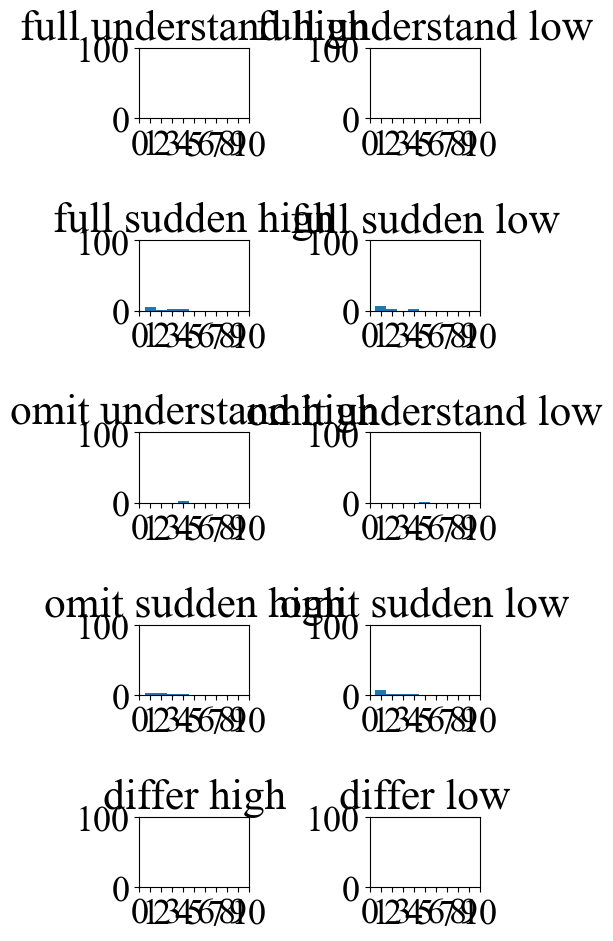

In [29]:
# Show histogram
import matplotlib.pyplot as plt

edges = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
yticks = [0, 25, 50, 75, 100]

fig = plt.figure(tight_layout=True, figsize=(5, 10))

hist1 = fig.add_subplot(5,2,1)
hist1.hist(full_understand_high, bins=edges)
hist1.set_xticks(xticks)
hist1.set_ylim(0, 100)
hist1.set_title("full understand high")

hist2 = fig.add_subplot(5,2,2)
hist2.hist(full_understand_low, bins=edges)
hist2.set_xticks(xticks)
hist2.set_ylim(0, 100)
hist2.set_title("full understand low")

hist3 = fig.add_subplot(5,2,3)
hist3.hist(full_sudden_high, bins=edges)
hist3.set_xticks(xticks)
hist3.set_ylim(0, 100)
hist3.set_title("full sudden high")

hist4 = fig.add_subplot(5,2,4)
hist4.hist(full_sudden_low, bins=edges)
hist4.set_xticks(xticks)
hist4.set_ylim(0, 100)
hist4.set_title("full sudden low")

hist5 = fig.add_subplot(5,2,5)
hist5.hist(omit_understand_high, bins=edges)
hist5.set_xticks(xticks)
hist5.set_ylim(0, 100)
hist5.set_title("omit understand high")

hist6 = fig.add_subplot(5,2,6)
hist6.hist(omit_understand_low, bins=edges)
hist6.set_xticks(xticks)
hist6.set_ylim(0, 100)
hist6.set_title("omit understand low")

hist7 = fig.add_subplot(5,2,7)
hist7.hist(omit_sudden_high, bins=edges)
hist7.set_xticks(xticks)
hist7.set_ylim(0, 100)
hist7.set_title("omit sudden high")

hist8 = fig.add_subplot(5,2,8)
hist8.hist(omit_sudden_low, bins=edges)
hist8.set_xticks(xticks)
hist8.set_ylim(0, 100)
hist8.set_title("omit sudden low")

hist9 = fig.add_subplot(5,2,9)
hist9.hist(differ_high, bins=edges)
hist9.set_xticks(xticks)
hist9.set_ylim(0, 100)
hist9.set_title("differ high")

hist10 = fig.add_subplot(5,2,10)
hist10.hist(differ_low, bins=edges)
hist10.set_xticks(xticks)
hist10.set_ylim(0, 100)
hist10.set_title("differ low")

In [30]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        
        # * is p < 0.05
        # ** is p < 0.01
        # *** is p < 0.001
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0) 

    y = max(ly, ry) + dh 

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

(1.3491706481792793, 1.437135858965388, 1.3085940167422419, 1.6087993330796875, 0.6978023391872252)
(1.4552137502179978, 2.5946148353447085, 1.855040827202527, 2.8382310609877335, 2.4145528280568067)


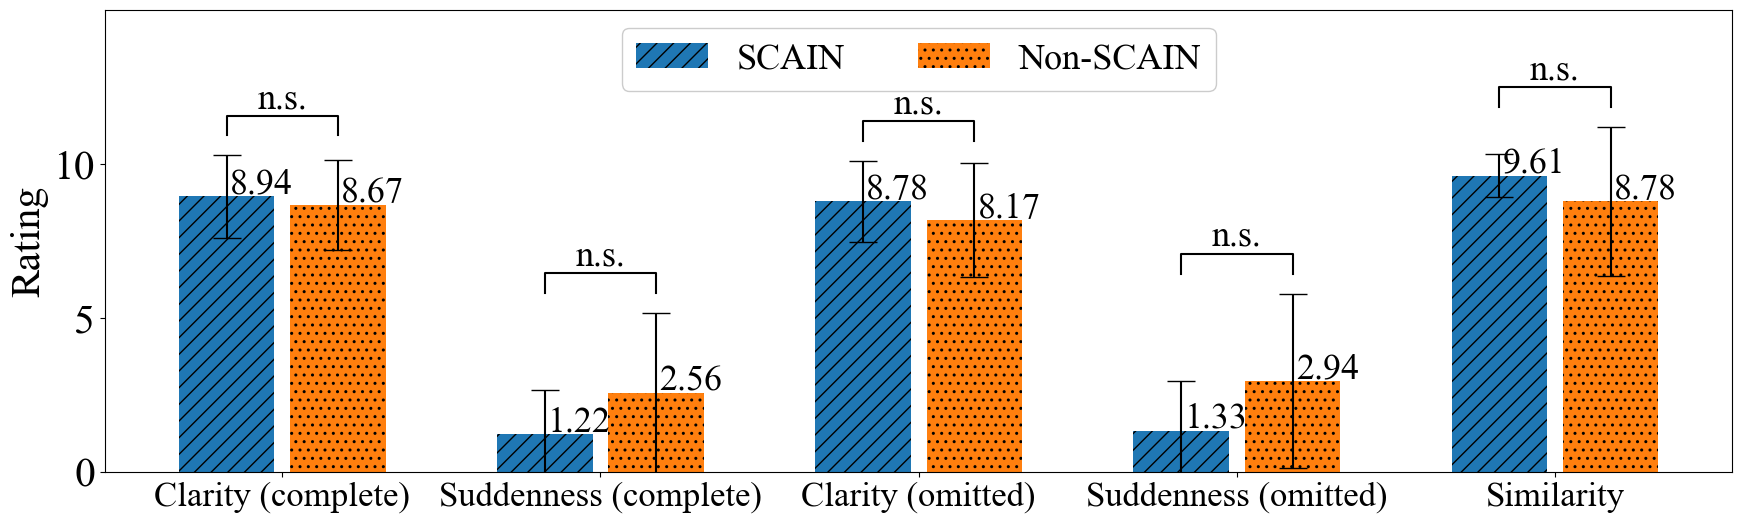

In [31]:
# Show bar graphs
import matplotlib.pyplot as plt
import statistics
import numpy as np

fig, ax = plt.subplots(figsize=(21, 6))
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 26                # 文字の大きさ
labels = ("Clarity (complete)", "Suddenness (complete)", "Clarity (omitted)", "Suddenness (omitted)", "Similarity")
rate_means = {
    "SCAIN": ((
        statistics.mean(full_understand_low),
        statistics.mean(full_sudden_low),
        statistics.mean(omit_understand_low),
        statistics.mean(omit_sudden_low),
        statistics.mean(differ_low)
    ),
    (
        statistics.stdev(full_understand_low),
        statistics.stdev(full_sudden_low), 
        statistics.stdev(omit_understand_low), 
        statistics.stdev(omit_sudden_low), 
        statistics.stdev(differ_low)
    )),
    "Non-SCAIN": ((
        statistics.mean(full_understand_high),
        statistics.mean(full_sudden_high),
        statistics.mean(omit_understand_high),
        statistics.mean(omit_sudden_high),
        statistics.mean(differ_high)
    ),
    (
        statistics.stdev(full_understand_high),
        statistics.stdev(full_sudden_high), 
        statistics.stdev(omit_understand_high), 
        statistics.stdev(omit_sudden_high), 
        statistics.stdev(differ_high)
    ))
}
rate_stds = {
    "SCAIN": (
        statistics.stdev(full_understand_low),
        statistics.stdev(full_sudden_low), 
        statistics.stdev(omit_understand_low), 
        statistics.stdev(omit_sudden_low), 
        statistics.stdev(differ_low)
    ),
    "Non-SCAIN": (
        statistics.stdev(full_understand_high),
        statistics.stdev(full_sudden_high), 
        statistics.stdev(omit_understand_high), 
        statistics.stdev(omit_sudden_high), 
        statistics.stdev(differ_high)
    )
}
x = np.arange(len(labels))
width = 0.3
margin = 0.05
multiplier = 0
# yticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
yticks = [0, 5, 10]
ylim = (0, 15)

xcoord = []
ycoord = []
for attribute, measurement in rate_means.items():
    offset = (width + margin) * multiplier
    rects = ax.bar(x + offset, measurement[0], width, yerr=measurement[1], capsize=10, label=attribute)
    #ax.bar_label(rects, fmt="%0.2f")
    print(measurement[1])
    for i in range(len(x)):
        plt.text(x[i] + offset + 0.01, measurement[0][i] + 0.1, "{:1.2f}".format(measurement[0][i]))
        xcoord.append(x[i] + offset)
        ycoord.append(measurement[0][i] + measurement[1][i])
    multiplier += 1

bars = ax.patches
patterns = ['//', '..']  # set hatch patterns in the correct order
hatches = []  # list for hatches in the order of the bars
for h in patterns:  # loop over patterns to create bar-ordered hatches
    for i in range(int(len(bars) / len(patterns))):
        hatches.append(h)
for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
    bar.set_hatch(hatch)

#xcoord = [i + d for i in range(len(x)) for d in [-(width + margin) / 2, (width + margin) / 2]]
barplot_annotate_brackets(0, 5, "n.s.", xcoord, ycoord)
barplot_annotate_brackets(1, 6, "n.s.", xcoord, ycoord)
barplot_annotate_brackets(2, 7, "n.s.", xcoord, ycoord)
barplot_annotate_brackets(3, 8, "n.s.", xcoord, ycoord)
barplot_annotate_brackets(4, 9, "n.s.", xcoord, ycoord)

plt.xticks(fontsize=25)
plt.yticks(fontsize=30)
ax.set_ylabel("Rating", fontsize=30)
ax.set_xticks(x + (width + margin) / 2, labels)
ax.set_yticks(yticks)
# ax.set_yticks([0, 5, 10])
ax.set_ylim(ylim)
ax.legend(loc='upper center', ncols=2, framealpha=1)


(3.0593262533085626, 3.352883843105734, 1.0289915108550531, 1.3085940167422419)
(3.19568745353071, 1.3920878193318216, 1.0981267472114393, 1.855040827202527)


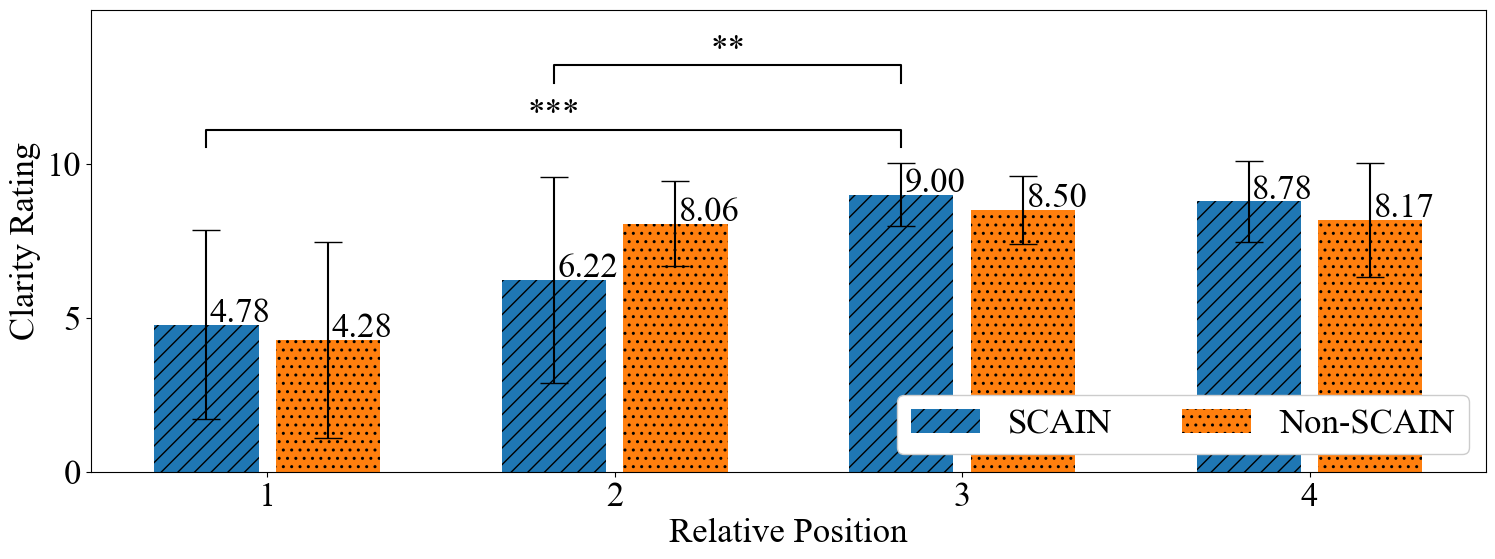

In [9]:
# Clarity by Position
import matplotlib.pyplot as plt
import statistics
import numpy as np

fig, ax = plt.subplots(figsize=(18, 6))
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 25                 # 文字の大きさ
labels = (1, 2, 3, 4)
rate_means = {
    "SCAIN": ((
        statistics.mean(understand_low_1),
        statistics.mean(understand_low_2),
        statistics.mean(understand_low_3),
        statistics.mean(understand_low_4)
    ),
    (
        statistics.stdev(understand_low_1),
        statistics.stdev(understand_low_2), 
        statistics.stdev(understand_low_3), 
        statistics.stdev(understand_low_4), 
    )),
    "Non-SCAIN": ((
        statistics.mean(understand_high_1),
        statistics.mean(understand_high_2),
        statistics.mean(understand_high_3),
        statistics.mean(understand_high_4)
    ),
    (
        statistics.stdev(understand_high_1),
        statistics.stdev(understand_high_2), 
        statistics.stdev(understand_high_3), 
        statistics.stdev(understand_high_4), 
    ))
}
rate_stds = {
    "SCAIN": (
        statistics.stdev(understand_low_1),
        statistics.stdev(understand_low_2), 
        statistics.stdev(understand_low_3), 
        statistics.stdev(understand_low_4), 
    ),
    "Non-SCAIN": (
        statistics.stdev(understand_high_1),
        statistics.stdev(understand_high_2), 
        statistics.stdev(understand_high_3), 
        statistics.stdev(understand_high_4), 
    )
}
x = np.arange(len(labels))
width = 0.3
margin = 0.05
multiplier = 0
# yticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
yticks = [0, 5, 10]
ylim = (0, 15)


xcoord = []
ycoord = []
x1 = []
y1 = []
y2 = []

for attribute, measurement in rate_means.items():
    offset = (width + margin) * multiplier
    rects = ax.bar(x + offset, measurement[0], width, yerr=measurement[1], capsize=10, label=attribute)
    #ax.bar_label(rects, fmt="%0.2f")
    print(measurement[1])
    for i in range(len(x)):
        plt.text(x[i] + offset + 0.01, measurement[0][i] + 0.1, "{:1.2f}".format(measurement[0][i]))
        xcoord.append(x[i] + offset)
        x1.append(x[i] + offset - 1)
        ycoord.append(measurement[0][i] + measurement[1][i])
        y1.append(measurement[0][i] + measurement[1][i] + 0.5)
        y2.append(measurement[0][i] + measurement[1][i] + 2)
        
    multiplier += 1

bars = ax.patches
patterns = ['//', '..']  # set hatch patterns in the correct order
hatches = []  # list for hatches in the order of the bars
for h in patterns:  # loop over patterns to create bar-ordered hatches
    for i in range(int(len(bars) / len(patterns))):
        hatches.append(h)
for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
    bar.set_hatch(hatch)

#xcoord = [i + d for i in range(len(x)) for d in [-(width + margin) / 2, (width + margin) / 2]]
# barplot_annotate_brackets(0, 4, "n.s.", xcoord, ycoord)
# barplot_annotate_brackets(1, 5, "n.s.", xcoord, ycoord)
# barplot_annotate_brackets(2, 6, "n.s.", xcoord, ycoord)
# barplot_annotate_brackets(3, 7, "n.s.", xcoord, ycoord)
barplot_annotate_brackets(0, 2, "***", xcoord, ycoord)
barplot_annotate_brackets(1, 2, "**", xcoord, y2)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("Relative Position", fontsize=25)
ax.set_ylabel("Clarity Rating", fontsize=25)
ax.set_xticks(x + (width + margin) / 2, labels)
ax.set_yticks(yticks)
ax.set_ylim(ylim)
ax.legend(loc='lower right', ncols=2, framealpha=1)


(3.0097879542273014, 3.7416573867739413, 1.9478494929174643, 1.6087993330796875)
(3.3102139417066807, 2.478667151852625, 2.3570226039551585, 2.8382310609877335)


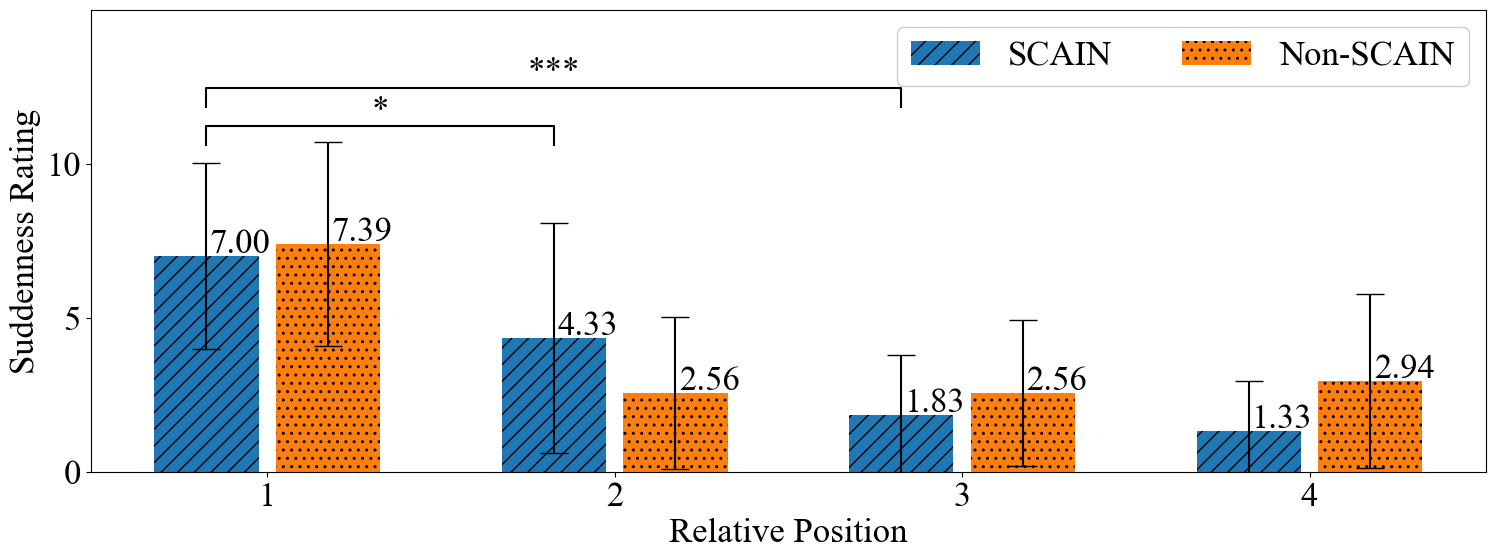

In [10]:
# Suddness by Position
import matplotlib.pyplot as plt
import statistics
import numpy as np

fig, ax = plt.subplots(figsize=(18, 6))
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 25                 # 文字の大きさ
labels = (1, 2, 3, 4)
rate_means = {
    "SCAIN": ((
        statistics.mean(sudden_low_1),
        statistics.mean(sudden_low_2),
        statistics.mean(sudden_low_3),
        statistics.mean(sudden_low_4)
    ),
    (
        statistics.stdev(sudden_low_1),
        statistics.stdev(sudden_low_2), 
        statistics.stdev(sudden_low_3), 
        statistics.stdev(sudden_low_4), 
    )),
    "Non-SCAIN": ((
        statistics.mean(sudden_high_1),
        statistics.mean(sudden_high_2),
        statistics.mean(sudden_high_3),
        statistics.mean(sudden_high_4)
    ),
    (
        statistics.stdev(sudden_high_1),
        statistics.stdev(sudden_high_2), 
        statistics.stdev(sudden_high_3), 
        statistics.stdev(sudden_high_4), 
    ))
}
rate_stds = {
    "SCAIN": (
        statistics.stdev(sudden_low_1),
        statistics.stdev(sudden_low_2), 
        statistics.stdev(sudden_low_3), 
        statistics.stdev(sudden_low_4), 
    ),
    "Non-SCAIN": (
        statistics.stdev(sudden_high_1),
        statistics.stdev(sudden_high_2), 
        statistics.stdev(sudden_high_3), 
        statistics.stdev(sudden_high_4), 
    )
}
x = np.arange(len(labels))
width = 0.3
margin = 0.05
multiplier = 0
# yticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
yticks = [0, 5, 10]
ylim = (0, 15)

xcoord = []
ycoord = []
y1 = []
y2 = []


for attribute, measurement in rate_means.items():
    offset = (width + margin) * multiplier
    rects = ax.bar(x + offset, measurement[0], width, yerr=measurement[1], capsize=10, label=attribute)
    #ax.bar_label(rects, fmt="%0.2f")
    print(measurement[1])
    for i in range(len(x)):
        plt.text(x[i] + offset + 0.01, measurement[0][i] + 0.1, "{:1.2f}".format(measurement[0][i]))
        xcoord.append(x[i] + offset)
        ycoord.append(measurement[0][i] + measurement[1][i])
        y1.append(measurement[0][i] + measurement[1][i] + 1.2)
        y2.append(measurement[0][i] + measurement[1][i] + 2)
    multiplier += 1

bars = ax.patches
patterns = ['//', '..']  # set hatch patterns in the correct order
hatches = []  # list for hatches in the order of the bars
for h in patterns:  # loop over patterns to create bar-ordered hatches
    for i in range(int(len(bars) / len(patterns))):
        hatches.append(h)
for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
    bar.set_hatch(hatch)

#xcoord = [i + d for i in range(len(x)) for d in [-(width + margin) / 2, (width + margin) / 2]]
# barplot_annotate_brackets(0, 4, "n.s.", xcoord, ycoord)
# barplot_annotate_brackets(1, 5, "n.s.", xcoord, ycoord)
# barplot_annotate_brackets(2, 6, "n.s.", xcoord, ycoord)
# barplot_annotate_brackets(3, 7, "n.s.", xcoord, ycoord)
barplot_annotate_brackets(0, 1, "*", xcoord, ycoord)
barplot_annotate_brackets(0, 2, "***", xcoord, y1)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("Relative Position", fontsize=25)
ax.set_ylabel("Suddenness Rating", fontsize=25)
ax.set_xticks(x + (width + margin) / 2, labels)
ax.set_yticks(yticks)
ax.set_ylim(ylim)
ax.legend(loc='upper right', ncols=2, framealpha=1)


(2.42872246468334, 3.209463131860412, 2.1910393868598623, 0.6978023391872252)
(3.3645596202041803, 2.6965240273480524, 2.1753220781739078, 2.4145528280568067)


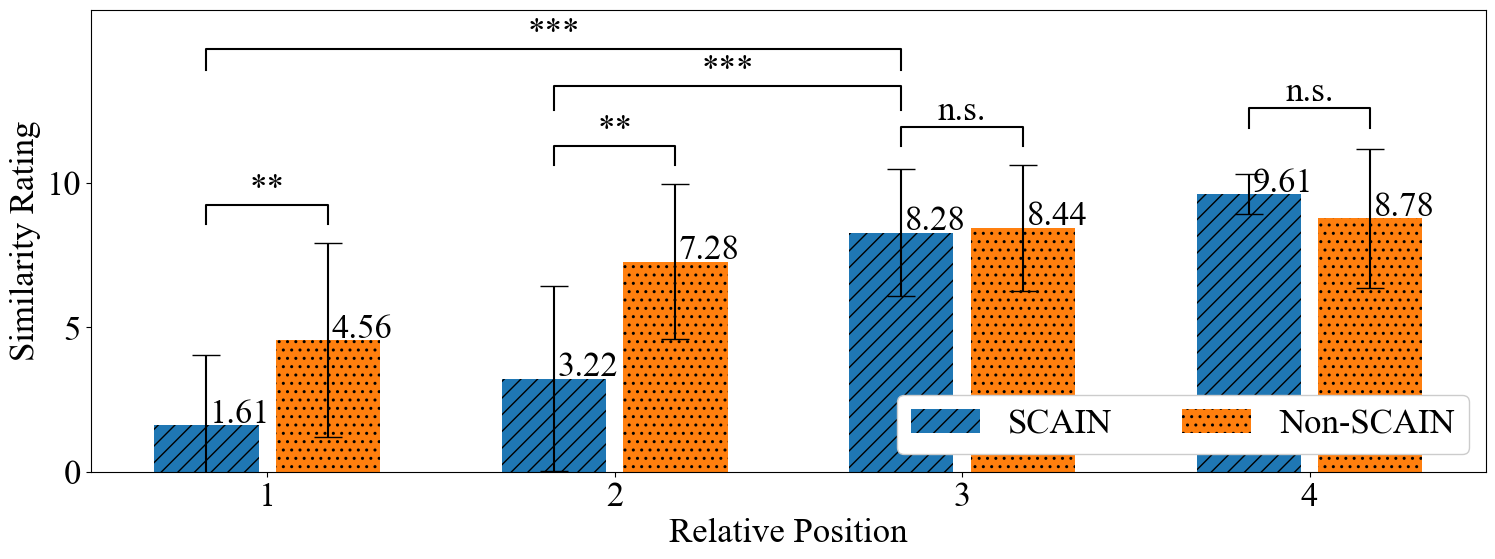

In [11]:
# Similarity by Position
import matplotlib.pyplot as plt
import statistics
import numpy as np

fig, ax = plt.subplots(figsize=(18, 6))
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 25                 # 文字の大きさ
labels = (1, 2, 3, 4)
rate_means = {
    "SCAIN": ((
        statistics.mean(differ_low_1),
        statistics.mean(differ_low_2),
        statistics.mean(differ_low_3),
        statistics.mean(differ_low_4)
    ),
    (
        statistics.stdev(differ_low_1),
        statistics.stdev(differ_low_2), 
        statistics.stdev(differ_low_3), 
        statistics.stdev(differ_low_4), 
    )),
    "Non-SCAIN": ((
        statistics.mean(differ_high_1),
        statistics.mean(differ_high_2),
        statistics.mean(differ_high_3),
        statistics.mean(differ_high_4)
    ),
    (
        statistics.stdev(differ_high_1),
        statistics.stdev(differ_high_2), 
        statistics.stdev(differ_high_3), 
        statistics.stdev(differ_high_4), 
    ))
}
rate_stds = {
    "SCAIN": (
        statistics.stdev(differ_low_1),
        statistics.stdev(differ_low_2), 
        statistics.stdev(differ_low_3), 
        statistics.stdev(differ_low_4), 
    ),
    "Non-SCAIN": (
        statistics.stdev(differ_high_1),
        statistics.stdev(differ_high_2), 
        statistics.stdev(differ_high_3), 
        statistics.stdev(differ_high_4), 
    )
}
x = np.arange(len(labels))
width = 0.3
margin = 0.05
multiplier = 0
# yticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
yticks = [0, 5, 10]
ylim = (0, 16)

xcoord = []
ycoord = []
y1 = []
y2 = []
for attribute, measurement in rate_means.items():
    offset = (width + margin) * multiplier
    rects = ax.bar(x + offset, measurement[0], width, yerr=measurement[1], capsize=10, label=attribute)
    #ax.bar_label(rects, fmt="%0.2f")
    print(measurement[1])
    for i in range(len(x)):
        plt.text(x[i] + offset + 0.01, measurement[0][i] + 0.1, "{:1.2f}".format(measurement[0][i]))
        xcoord.append(x[i] + offset)
        ycoord.append(measurement[0][i] + measurement[1][i])
        y1.append(measurement[0][i] + measurement[1][i] + 1.2)
        y2.append(measurement[0][i] + measurement[1][i] + 2.7)
    multiplier += 1

bars = ax.patches
patterns = ['//', '..']  # set hatch patterns in the correct order
hatches = []  # list for hatches in the order of the bars
for h in patterns:  # loop over patterns to create bar-ordered hatches
    for i in range(int(len(bars) / len(patterns))):
        hatches.append(h)
for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
    bar.set_hatch(hatch)

#xcoord = [i + d for i in range(len(x)) for d in [-(width + margin) / 2, (width + margin) / 2]]
barplot_annotate_brackets(0, 4, "**", xcoord, ycoord)
barplot_annotate_brackets(1, 5, "**", xcoord, ycoord)
barplot_annotate_brackets(2, 6, "n.s.", xcoord, ycoord)
barplot_annotate_brackets(3, 7, "n.s.", xcoord, ycoord)
barplot_annotate_brackets(0, 2, "***", xcoord, y2)
barplot_annotate_brackets(1, 2, "***", xcoord, y1)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_xlabel("Relative Position", fontsize=25)
ax.set_ylabel("Similarity Rating", fontsize=25)
ax.set_xticks(x + (width + margin) / 2, labels)
ax.set_yticks(yticks)
ax.set_ylim(ylim)
ax.legend(loc='lower right', ncols=2, framealpha=1)


In [ ]:
print(differ_high_1)